In [1]:
import pandas as pd
import os

In [2]:
# Both the abilities file and the typerank are highly subjective.  They were created using a combination of ngrams 
# as well as my own personal knowledge of the game.  These should be modified as you see fit.
dfabilities = pd.read_csv('abilities',header=None,names=['ability','rank'])
typerank = {'Enchantment':9,'Artifact':8,'Planeswalker':7,'Creature':5,'Instant':7,'Sorcery':1,'Land':10}

In [8]:
def commanderPower(powerList, DecklistDir, skipFile):
    for subdir,dirs,files in os.walk(DecklistDir):
        for file in files:
            if skipFile in file:
                continue
            deck = pd.read_csv(os.path.join(subdir,file))
            for dfindex,dfrows in deck.iterrows():
                ability_sum = 0
                for abilindex,abilrows in dfabilities.iterrows():
                    try:
                        if dfrows['oracle_text'].lower().find(abilrows['ability'].lower()) > -1:
                            ability_sum += abilrows['rank']
                    except:
                        continue
                deck.at[dfindex,'ability_score'] = ability_sum

            dfclean = deck[['cmc','type_line','loyalty','power','toughness','ability_score']].copy()
            for index,rows in dfclean.iterrows():
                typeline = rows['type_line']
                typewords = typeline.split()
                flag = True
                for a in typewords:
                    if a in typerank.keys():
                        dfclean.at[index,'type_line'] = typerank[a]
                        flag = False
                if flag:
                    dfclean.at[index,'type_line'] = 0
            dfclean=dfclean.fillna(0)

            # Variables like * and X need to be converted to integers
            for index,rows in dfclean.iterrows():
                if '*' in str(rows['loyalty']) or rows['loyalty'] == 'X':
                    dfclean.at[index,'loyalty']=0
                if '*' in str(rows['power']) or rows['power'] == 'X':
                    dfclean.at[index,'power']=0
                if '*' in str(rows['toughness']) or rows['toughness'] == 'X':
                    dfclean.at[index,'toughness']=0

            # Columns need to be converted to ints
            dfclean['power'] = dfclean['power'].astype(int)
            dfclean['toughness'] = dfclean['toughness'].astype(int)
            dfclean['loyalty'] = dfclean['loyalty'].astype(int)

            # Normalize values by dividing by max
            dfclean['ability_score'] = dfclean['ability_score']/dfclean.apply(max)['ability_score']
            dfclean['type_line'] = dfclean['type_line']/dfclean.apply(max)['type_line']
            dfclean['loyalty'] = dfclean['loyalty']/dfclean.apply(max)['loyalty']
            dfclean['power'] = dfclean['power']/dfclean.apply(max)['power']
            dfclean['toughness'] = dfclean['toughness']/dfclean.apply(max)['toughness']
            dfclean['cmc'] = 1/(dfclean['cmc']+1)
            dfclean=dfclean.fillna(0)

            dfclean['card_power']=dfclean.sum(axis=1)/dfclean.astype(bool).sum(axis=1)

            powerList.append(dfclean['card_power'].sum())

In [100]:
atraxa = []
commanderPower(atraxa,'Decklists/atraxa-praetors-voice/','atraxa-praetors-voice.csv')

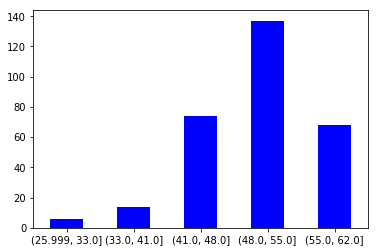

In [101]:
binsize = (max(atraxa)-min(atraxa))/5
bins = [int(min(atraxa)), int(min(atraxa)+binsize), int(min(atraxa)+2*binsize),
        int(min(atraxa)+3*binsize), int(min(atraxa)+4*binsize), int(max(atraxa))]
out = pd.cut(atraxa, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))

In [9]:
breya = []
commanderPower(breya, 'Decklists/breya-etherium-shaper/','breya-etherium-shaper.csv')

binsize = (max(breya)-min(breya))/5
bins = [int(min(breya)), int(min(breya)+binsize), int(min(breya)+2*binsize),
        int(min(breya)+3*binsize), int(min(breya)+4*binsize), int(max(breya))]
out = pd.cut(breya, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))

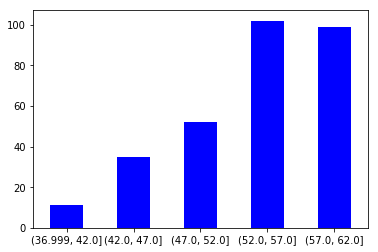

In [14]:
binsize = (max(breya)-min(breya))/5
bins = [int(min(breya)), int(min(breya)+binsize), int(min(breya)+2*binsize),
        int(min(breya)+3*binsize), int(min(breya)+4*binsize), int(max(breya))]
out = pd.cut(breya, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))

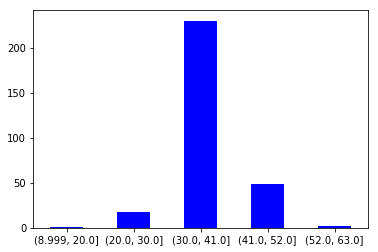

In [10]:
lyra = []
commanderPower(lyra, 'Decklists/lyra-dawnbringer/','lyra-dawnbringer.csv')

binsize = (max(lyra)-min(lyra))/5
bins = [int(min(lyra)), int(min(lyra)+binsize), int(min(lyra)+2*binsize),
        int(min(lyra)+3*binsize), int(min(lyra)+4*binsize), int(max(lyra))]
out = pd.cut(lyra, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))

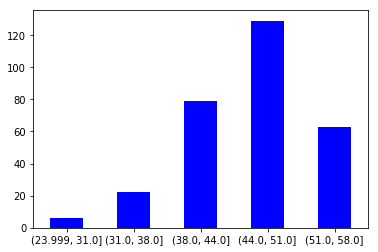

In [11]:
karador = []
commanderPower(karador, 'Decklists/karador-ghost-chieftain/','karador-ghost-chieftain.csv')

binsize = (max(karador)-min(karador))/5
bins = [int(min(karador)), int(min(karador)+binsize), int(min(karador)+2*binsize),
        int(min(karador)+3*binsize), int(min(karador)+4*binsize), int(max(karador))]
out = pd.cut(karador, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))

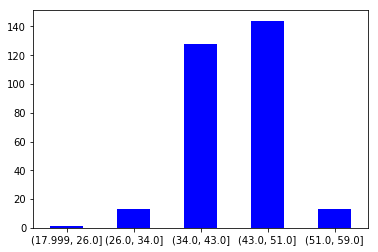

In [12]:
locust = []
commanderPower(locust, 'Decklists/the-locust-god/','the-locust-god.csv')

binsize = (max(locust)-min(locust))/5
bins = [int(min(locust)), int(min(locust)+binsize), int(min(locust)+2*binsize),
        int(min(locust)+3*binsize), int(min(locust)+4*binsize), int(max(locust))]
out = pd.cut(locust, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))

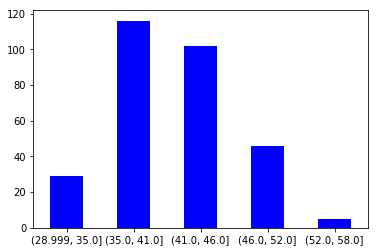

In [13]:
sram = [] 
commanderPower(sram, 'Decklists/sram-senior-edificer/','sram-senior-edificer.csv')

binsize = (max(sram)-min(sram))/5
bins = [int(min(sram)), int(min(sram)+binsize), int(min(sram)+2*binsize),
        int(min(sram)+3*binsize), int(min(sram)+4*binsize), int(max(sram))]
out = pd.cut(sram, bins=bins, include_lowest=True)
ax = out.value_counts().plot.bar(rot=0,color="b", figsize=(6,4))